# Linear Regression From Scratch

This notebook implements **Linear Regression** using **pure math** and **NumPy only** — no `scikit-learn` models for the main training step.

**Goal:** Predict house prices using a single feature (**Median Income**) from the California Housing Dataset.


# PART 1 — Setup & Data

Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
X shape: (20640, 8)
y shape: (20640,)
X shape after single feature: (20640, 1)


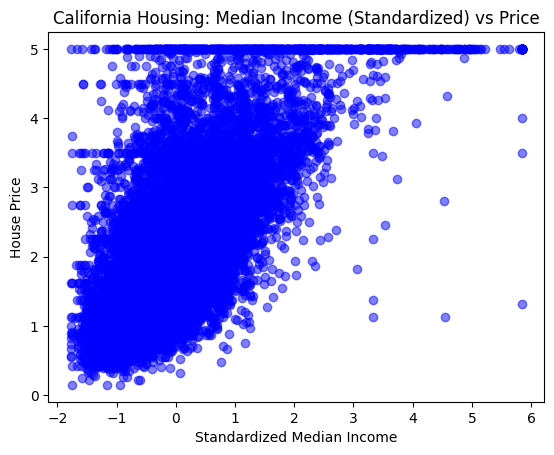

In [ ]:
# 1️⃣ Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 2️⃣ Load dataset
data = fetch_california_housing()
X, y = data.data, data.target
print("Feature names:", data.feature_names)
print("X shape:", X.shape)
print("y shape:", y.shape)

# 3️⃣ Pick ONE feature: MedInc (Median Income)
X = X[:, [0]]  # Only Median Income
print("X shape after single feature:", X.shape)

# 4️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ 5️⃣ Standardize the feature (mean = 0, std = 1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6️⃣ Visualize (after scaling, so we inverse-transform for clearer plot)
plt.scatter(X_train, y_train, color='blue', alpha=0.5)
plt.xlabel("Standardized Median Income")
plt.ylabel("House Price")
plt.title("California Housing: Median Income (Standardized) vs Price")
plt.show()


##  Setup, Load Data & Scaling

In this section, we:

-  **Import libraries**: `numpy` for math, `matplotlib` for plots, `sklearn.datasets` for an easy real-world dataset.
-  **Load the California Housing dataset** and select **one feature** (`MedInc` — Median Income) for simple 2D regression.
-  **Split the data** into training and test sets so we can test generalization.
-  **Standardize the feature**:
  - Linear Regression works much better when the input is **scaled** (mean = 0, standard deviation = 1).
  - This helps **Gradient Descent** converge smoothly.
  - We use `StandardScaler` to transform `X_{\text{train}}` and `X_{\text{test}}`.
-  **Visualize** the data (after scaling) to check the relationship between standardized income and house price.

---

✅ **Key takeaway:**  
Scaling ensures that Gradient Descent updates for the weight ($w$) and bias ($b$) work properly and do not overshoot due to large feature values.


# PART 2 — Maths (How Linear Regression Works)



**Linear Regression Hypothesis:**  
The prediction is a simple straight line:  
$$
\hat{y} = wX + b
$$

---

**Goal:**  
Find the best `w` (weight) and `b` (bias) that minimize the **Mean Squared Error (MSE)** between predicted and actual values.

---

**Mean Squared Error (MSE):**  
$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

---

**Gradient Descent:**  
We use Gradient Descent to update `w` and `b` step by step to minimize the loss.

---

**Parameter updates:**  
$$
w := w - \alpha \frac{\partial MSE}{\partial w} \\
b := b - \alpha \frac{\partial MSE}{\partial b}
$$

- $\alpha$ is the **learning rate** — it controls how big each step is.
- We repeat this process for many epochs until the loss converges.


# PART 3 — Implementation (From Scratch)

In [ ]:
# 1️⃣ Initialize weights
w = 0.0
b = 0.0

# 2️⃣ Hyperparameters
lr = 0.0005
epochs = 3000

# 3️⃣ Record loss
losses = []

# 4️⃣ Gradient Descent loop
n = len(X_train)

for epoch in range(epochs):
    y_pred = w * X_train + b
    error = y_pred.flatten() - y_train

    # Gradients
    dw = (2/n) * np.dot(X_train.flatten(), error)
    db = (2/n) * np.sum(error)

    # Update
    w -= lr * dw
    b -= lr * db

    # MSE
    mse = np.mean(error ** 2)
    losses.append(mse)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: MSE = {mse:.4f}")

print(f"\nFinal w: {w:.4f}")
print(f"Final b: {b:.4f}")


Epoch 0: MSE = 5.6297
Epoch 100: MSE = 4.7356
Epoch 200: MSE = 4.0036
Epoch 300: MSE = 3.4043
Epoch 400: MSE = 2.9137
Epoch 500: MSE = 2.5121
Epoch 600: MSE = 2.1833
Epoch 700: MSE = 1.9142
Epoch 800: MSE = 1.6938
Epoch 900: MSE = 1.5134
Epoch 1000: MSE = 1.3658
Epoch 1100: MSE = 1.2449
Epoch 1200: MSE = 1.1459
Epoch 1300: MSE = 1.0649
Epoch 1400: MSE = 0.9986
Epoch 1500: MSE = 0.9443
Epoch 1600: MSE = 0.8998
Epoch 1700: MSE = 0.8634
Epoch 1800: MSE = 0.8336
Epoch 1900: MSE = 0.8092
Epoch 2000: MSE = 0.7893
Epoch 2100: MSE = 0.7729
Epoch 2200: MSE = 0.7595
Epoch 2300: MSE = 0.7486
Epoch 2400: MSE = 0.7396
Epoch 2500: MSE = 0.7323
Epoch 2600: MSE = 0.7263
Epoch 2700: MSE = 0.7214
Epoch 2800: MSE = 0.7173
Epoch 2900: MSE = 0.7140

Final w: 0.7588
Final b: 1.9689


## Training: Gradient Descent Loop

In this section, we:
- Initialize `w` and `b` with starting guesses (e.g., 0).
- Define **hyperparameters**:  
  - `lr` (learning rate): how big each update step is.
  - `epochs`: how many times to run through all the data.
- For each epoch:
  - Make predictions: $$(\hat{y} = wX + b)$$
  - Calculate the **error**.
  - Compute gradients for `w` and `b`.
  - Update `w` and `b` in the direction that reduces MSE.
  - Record the MSE to check if it’s decreasing.

At the end, we print the final values for `w` and `b` — these define the **best-fit line**.


# PART 4 — Visualize Fitted Line

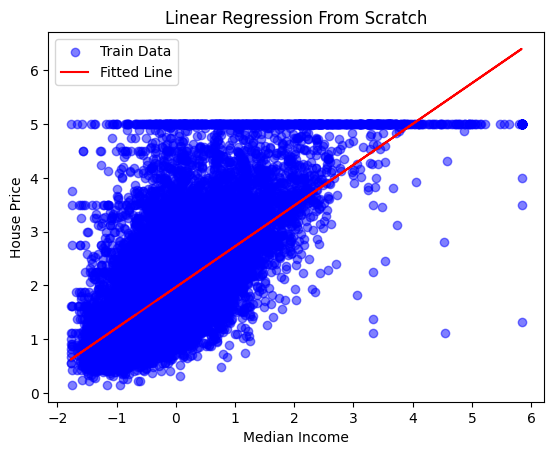

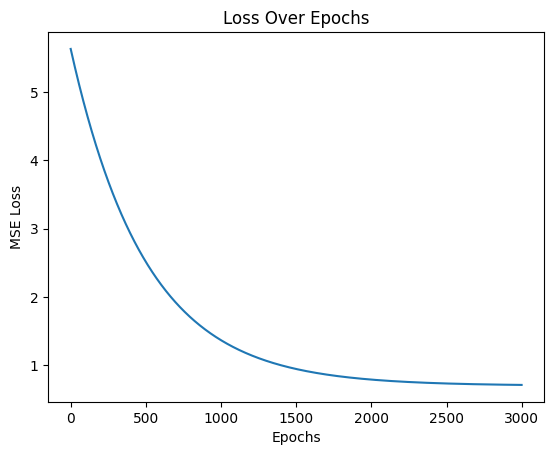

In [ ]:
# Plot fitted line
plt.scatter(X_train, y_train, color='blue', alpha=0.5, label="Train Data")
plt.plot(X_train, w * X_train + b, color='red', label="Fitted Line")
plt.xlabel("Median Income")
plt.ylabel("House Price")
plt.title("Linear Regression From Scratch")
plt.legend()
plt.show()

# Loss curve
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Loss Over Epochs")
plt.show()


## Visualize the Fitted Line

Now that we have the best `w` and `b`:
- Plot the **original training data** as a scatter plot.
- Overlay the **predicted line**: this shows how well our model fits the data.
- Also plot the **MSE loss curve**: this shows if the model’s error is decreasing steadily.

This step helps us visually verify that our linear regression is working correctly.


# PART 5 — Compare with `sklearn`

Sklearn w: 0.7985195644260351
Sklearn b: 2.071946937378876


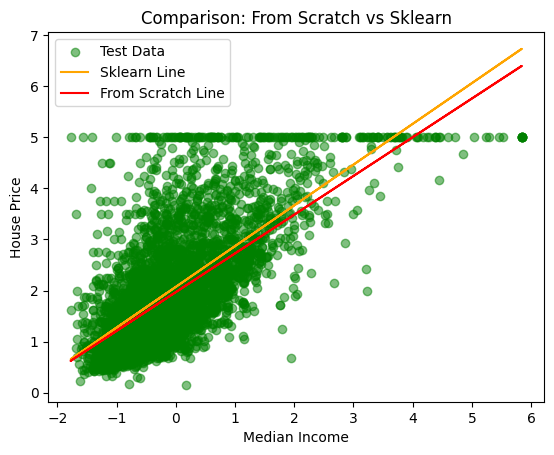

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print("Sklearn w:", model.coef_[0])
print("Sklearn b:", model.intercept_)

# Compare predictions
plt.scatter(X_test, y_test, color='green', alpha=0.5, label="Test Data")
plt.plot(X_test, model.predict(X_test), color='orange', label="Sklearn Line")
plt.plot(X_test, w * X_test + b, color='red', label="From Scratch Line")
plt.xlabel("Median Income")
plt.ylabel("House Price")
plt.title("Comparison: From Scratch vs Sklearn")
plt.legend()
plt.show()


##  Compare With `scikit-learn` LinearRegression

Finally, we:
- Train the **same problem** using `scikit-learn`’s built-in `LinearRegression` for comparison.
- Print the `w` and `b` from scikit-learn.
- Plot the sklearn line together with **our line** and **test data**.

This step **validates** that our math-based implementation produces the same (or very close) result as a trusted library.


# Conclusion

We implemented **Linear Regression from scratch**:
- Used only **numpy** for matrix math.
- Applied **Gradient Descent** to learn parameters.
- Visualized both the **fit** and the **loss curve**.
- Verified correctness by comparing with **scikit-learn**.

This builds your foundation for understanding **all other supervised learning algorithms** — because most use the same principles:  
 Hypothesis ➜ Loss ➜ Gradient ➜ Update.


# Extra

## Linear Regression can easily handle **more than one feature** — that’s called **Multiple Linear Regression**.

---

##  **Key Idea**

When you use **one feature**, the model is a **line**:

$$
\hat{y} = wX + b
$$

When you use **multiple features**, it becomes a **hyperplane**:

$$
\hat{y} = w_1X_1 + w_2X_2 + \dots + w_nX_n + b
$$

So instead of **one weight**, you have **a weight for each feature**.

---

##  **Example: Multiple Features**

Suppose you pick **3 features** from the California Housing dataset:

- `MedInc` (Median Income)
- `AveRooms` (Average Rooms)
- `Population` (Neighborhood Population)

Then the prediction is:

$$
\hat{y} = w_1 \times \text{MedInc} + w_2 \times \text{AveRooms} + w_3 \times \text{Population} + b
$$

---

##  **How the code changes**

 The math is the same — but:

- `X` is now a **matrix**: rows = samples, columns = features.
- `w` is now a **vector** of weights.

---

###  **Updated Hypothesis**

**Vectorized form:**

$$
\hat{y} = Xw + b
$$

- `X` → shape `(n_samples, n_features)`  
- `w` → shape `(n_features, 1)`

---

###  **Updated Gradient Descent**

**The loss (MSE)** stays the same, but you now calculate gradients for **each weight**.

**Vectorized gradient formulas:**

$$
dw = -\frac{2}{n} X^T (y - \hat{y})
$$

$$
db = -\frac{2}{n} \sum (y - \hat{y})
$$

---

###  **Code Difference**

**Instead of:**  
```python
y_pred = w * X + b  # Single feature
```
**Use**
```python
y_pred = np.dot(X, w) + b  # Multiple features
```

---

### **Visualization**
The only difference is visualization:

- With 1 feature, you can plot a line.

- With 2 features, you can plot a plane (3D surface).

- With 3+ features, you can’t plot directly — but you can visualize loss curves, weight values, or feature importance instead.

---


### **Why use multiple features?**

- Real-world prediction almost always needs multiple inputs.

- Multiple Linear Regression is still linear, so it’s easy to interpret.

- Adding more features increases model capacity — but you must watch for overfitting!


